In [ ]:
# YUN ZHOU 1009709442 Assignment 3
# Assignment 3: INF2178 Technical Assignment 3 _Explore Kindergarten students scores

In [1]:
import pandas as pd

#load data
data_path = 'INF2178_A3_data.csv'
df = pd.read_csv(data_path)

#show the top 5 rows
df.head()


,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


In [2]:
#Data analysis (EDA)

#Summary statistics for scores and income
summary_statistics = df.describe()

#Checking for missing values
missing_values = df.isnull().sum()

#Income group distribution
income_group_distribution = df['incomegroup'].value_counts(normalize=True)

print('summary_statistics: \n',summary_statistics)



summary_statistics: 
        fallreadingscore  fallmathscore  fallgeneralknowledgescore  \
count      11933.000000   11933.000000               11933.000000   
mean          35.954215      27.128244                  23.073694   
std           10.473130       9.120505                   7.396978   
min           21.010000      10.510000                   6.985000   
25%           29.340000      20.680000                  17.385000   
50%           34.060000      25.680000                  22.954000   
75%           39.890000      31.590000                  28.305000   
max          138.510000     115.650000                  47.691000   

       springreadingscore  springmathscore  springgeneralknowledgescore  \
count        11933.000000     11933.000000                 11933.000000   
mean            47.511178        37.799461                    28.235584   
std             14.327111        12.027753                     7.577457   
min             22.350000        11.900000              

In [3]:
print('missing_values: \n',missing_values)
print('income_group_distribution: \n',income_group_distribution)

missing_values: 
 fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
totalhouseholdincome           0
incomeinthousands              0
incomegroup                    0
dtype: int64
income_group_distribution: 
 1    0.396296
2    0.312243
3    0.291461
Name: incomegroup, dtype: float64


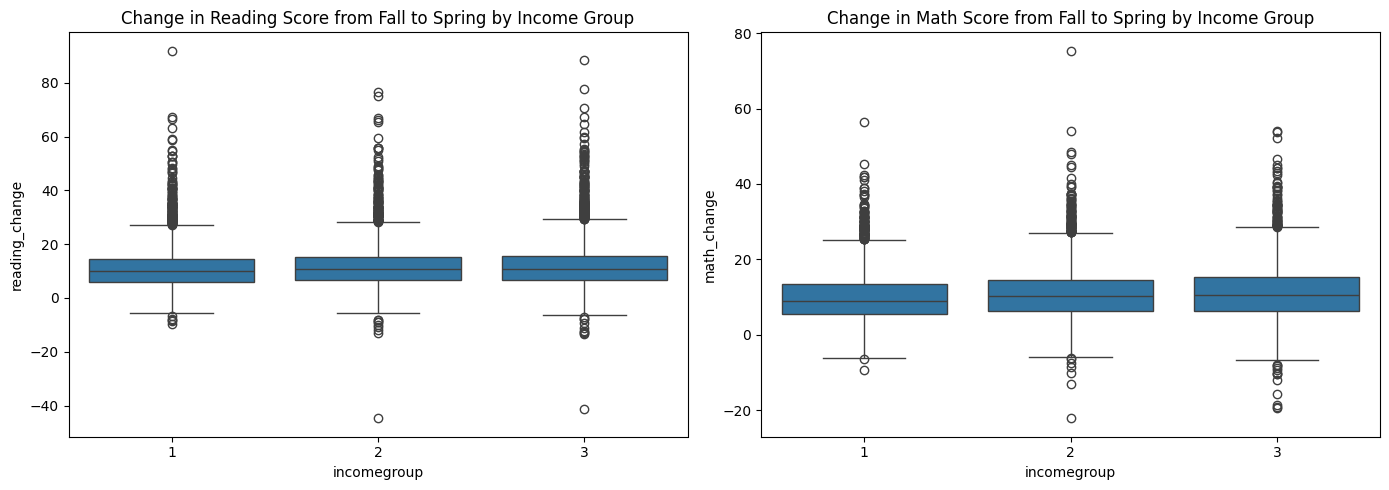

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

#Calculate change in scores for reading and math from fall to spring
df['reading_change'] = df['springreadingscore'] - df['fallreadingscore']
df['math_change'] = df['springmathscore'] - df['fallmathscore']

#Create boxplot for changes in reading and math
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='incomegroup', y='reading_change', data=df)
plt.title('Change in Reading Score from Fall to Spring by Income Group')

plt.subplot(1, 2, 2)
sns.boxplot(x='incomegroup', y='math_change', data=df)
plt.title('Change in Math Score from Fall to Spring by Income Group')

plt.tight_layout()
plt.show()



In [5]:

#Test Assumptions
from scipy.stats import levene, shapiro

#Test ANCOVA assumptions
def test_ANCOVA_assumptions(df, dependent_var, covariate, group_var):
    # homogeneity of variances
    levene_stat, levene_p = levene(df[dependent_var][df[group_var] == 1],
                                   df[dependent_var][df[group_var] == 2],
                                   df[dependent_var][df[group_var] == 3])

    # check normality residuals
    model = ols(f'{dependent_var} ~ C({group_var}) + {covariate}', data=df).fit()
    shapiro_stat, shapiro_p = shapiro(model.resid)

    return {
        'levene_stat': levene_stat,
        'levene_p': levene_p,
        'shapiro_stat': shapiro_stat,
        'shapiro_p': shapiro_p
    }

#Test assumptions in reading change
assumptions_reading = test_ANCOVA_assumptions(df, 'reading_change', 'fallgeneralknowledgescore', 'incomegroup')

#Test assumptions in math change
assumptions_math = test_ANCOVA_assumptions(df, 'math_change', 'fallgeneralknowledgescore', 'incomegroup')

assumptions_reading, assumptions_math


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


({'levene_stat': 19.7280103692154,
  'levene_p': 2.794929503613517e-09,
  'shapiro_stat': 0.8996317386627197,
  'shapiro_p': 0.0},
 {'levene_stat': 22.215180179067378,
  'levene_p': 2.344180384098772e-10,
  'shapiro_stat': 0.9664044380187988,
  'shapiro_p': 0.0})

<ipython-input-6-d2ed62dc5c1c>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='incomegroup', y='reading_change', data=df, ci=None)
<ipython-input-6-d2ed62dc5c1c>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='incomegroup', y='math_change', data=df, ci=None)


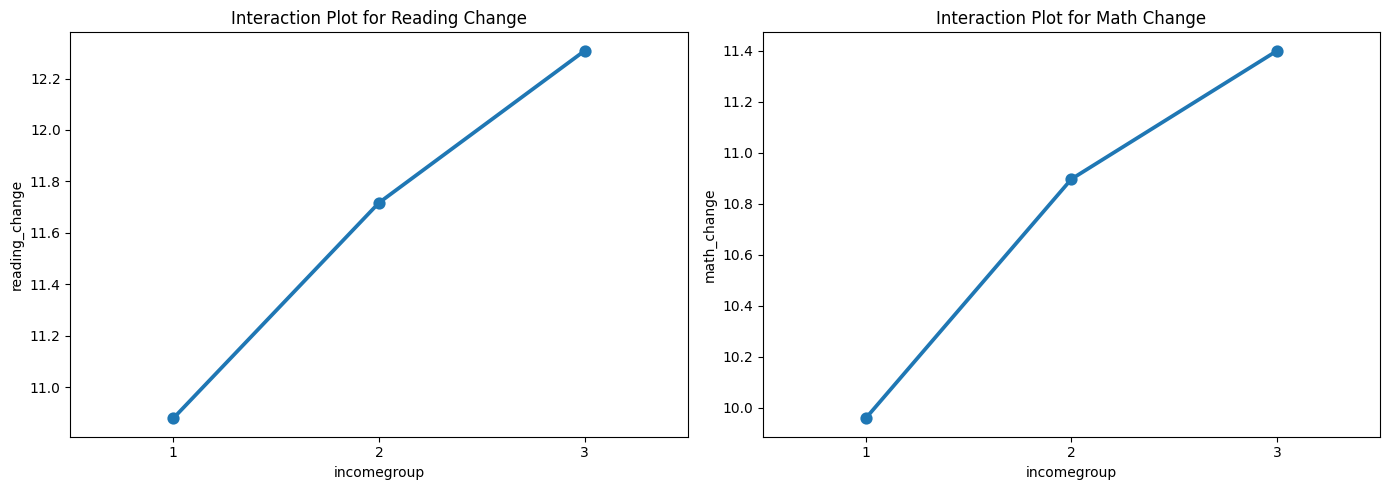

(                                  sum_sq       df           F        PR(>F)
 C(incomegroup)                287.485906      2.0    2.251247  1.053126e-01
 fallgeneralknowledgescore   14054.124684      1.0  220.110317  2.354473e-49
 Residual                   761671.036393  11929.0         NaN           NaN,
                                   sum_sq       df           F         PR(>F)
 C(incomegroup)                 55.879616      2.0    0.624286   5.356614e-01
 fallgeneralknowledgescore   22425.932956      1.0  501.083959  9.425259e-109
 Residual                   533880.499781  11929.0         NaN            NaN)

In [6]:
#ANCOVA for reading change controlling (by controlling fall general knowledge score
ancova_reading = ols('reading_change ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()

#ANCOVA for math change (by controlling for fall general knowledge score)
ancova_math = ols('math_change ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()

#Produce ANCOVA tables
from statsmodels.stats.anova import anova_lm

ancova_reading_table = anova_lm(ancova_reading, typ=2)
ancova_math_table = anova_lm(ancova_math, typ=2)

#Create interaction plots
plt.figure(figsize=(14, 5))

#For Reading change (score changes in reading by income group)
plt.subplot(1, 2, 1)
sns.pointplot(x='incomegroup', y='reading_change', data=df, ci=None)
plt.title('Interaction Plot for Reading Change')

#For Math change (score change in math by income group)
plt.subplot(1, 2, 2)
sns.pointplot(x='incomegroup', y='math_change', data=df, ci=None)
plt.title('Interaction Plot for Math Change')

plt.tight_layout()
plt.show()

ancova_reading_table, ancova_math_table
